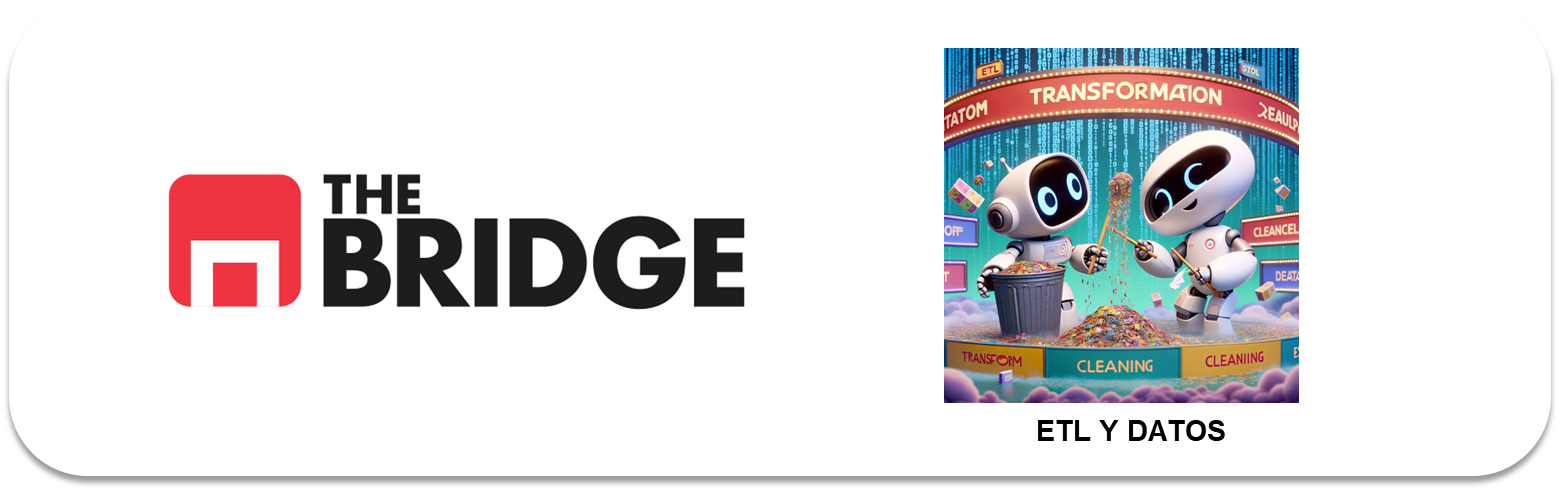

## PRACTICA OBLIGATORIA: Transformación y limpieza

* La práctica obligatoria de esta unidad consiste en cargar un dataset de Netflix y hacer un repaso completo del mismo, limpiando, transformando y creando algunas variables. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Carga de datos y primera exploración

In [24]:
import numpy as np
import pandas as pd
import re

df_peliculas = pd.read_csv("data/dataset_netflix_titles.csv")

1. Haz una primera exploración de los datos. Haz una primera visualización de la tabla, muestra la información general, la descripción de las variables numéricas, las columnas y muestra la distribución de datos de tres columnas escogidas por ti.

In [25]:
df = df_peliculas.copy()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [27]:
df.rating.value_counts() 
#Rating va a nuestra lista de "sucias" porque vemos muchos datos raros, que no conocemos y 3 filas con duración que no tienen sentido

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [28]:
df.director.value_counts(dropna=False)

director
NaN                               2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [29]:
df.type.value_counts()

type
Movie        5597
TV Show      1231
Series TV    1004
Film          534
Show          441
Name: count, dtype: int64

In [30]:
df.cast.value_counts(dropna=False)

cast
NaN                                                                                                                                                                                           825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

In [31]:
df.duration.value_counts(dropna=False)

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [32]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [33]:
df.country.value_counts() 
# Hay algunas que se producen en un único país y otras que tienen coproduccion

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

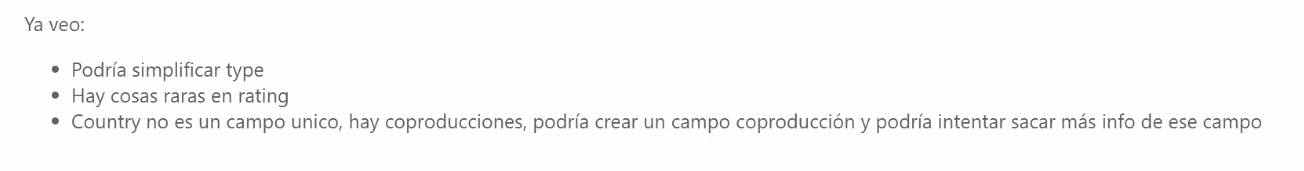

## #1 Duplicados y cardinalidad

1. ¿Existen filas duplicadas?¿Cuántas?

In [34]:
len(df[df.duplicated()])

0

2. Deshazte de las filas duplicadas, si las hubiera. Quédate con las últimas copias.

3. Ahora que no hay duplicados, tiene sentido calcular la cardinalidad de cada columna. Haz un programa que la obtenga y guarde el resultado en un diccionario con claves el nombre de las columnas y valores la cardinalidad (tal y como la hemos visto en el workout) de cada columna. [Nota: ¿has tenido en cuenta los valores nulos?]

In [35]:
diccionario_cardinalidad = {}
# Como esto lo vamos a utilizar mucho podemos hacer una función
for col in df: 
    cardinalidad = round(df[col].nunique()/len(df)*100, 2)
    diccionario_cardinalidad[col] = cardinalidad
    print(f"Cardinalidad de {col}: ",cardinalidad)

Cardinalidad de show_id:  100.0
Cardinalidad de type:  0.06
Cardinalidad de title:  100.0
Cardinalidad de director:  51.41
Cardinalidad de cast:  87.34
Cardinalidad de country:  8.49
Cardinalidad de date_added:  20.06
Cardinalidad de release_year:  0.84
Cardinalidad de rating:  0.19
Cardinalidad de duration:  2.5
Cardinalidad de listed_in:  5.84
Cardinalidad de description:  99.64


4. Haz un pequeño programa que recorra el diccionario y nos diga si hay alguna columna que pueda ser un buen índice (cardinalidad = 100%)


In [36]:
buen_indice = []
for col, cardinalidad in diccionario_cardinalidad.items():
    if cardinalidad == 100:
        buen_indice.append(col)
        print(f"La columna {col} con cardinalidad {cardinalidad} es la calve encontrada")

La columna show_id con cardinalidad 100.0 es la calve encontrada
La columna title con cardinalidad 100.0 es la calve encontrada


Bonus: Haz los ejercicios 3 y 4 pero usando un objeto `Series` en vez de un diccionario.

In [37]:
cardinalidad_serie = (df.nunique()/len(df)*100).round(2)
# El método .nunique() te devuelve una serie, que se puede dividir directamente por la longitud, y luego llamar a .round()

diccionario_cardinalidad_2 = dict(cardinalidad_serie)

print(cardinalidad_serie)
print(diccionario_cardinalidad_2)

show_id         100.00
type              0.06
title           100.00
director         51.41
cast             87.34
country           8.49
date_added       20.06
release_year      0.84
rating            0.19
duration          2.50
listed_in         5.84
description      99.64
dtype: float64
{'show_id': 100.0, 'type': 0.06, 'title': 100.0, 'director': 51.41, 'cast': 87.34, 'country': 8.49, 'date_added': 20.06, 'release_year': 0.84, 'rating': 0.19, 'duration': 2.5, 'listed_in': 5.84, 'description': 99.64}


In [38]:
posibles_indices = cardinalidad_serie[cardinalidad_serie == 100].index.to_list()
print(f"{posibles_indices} serían posibles índices" if posibles_indices else "No hay columnas que puedan ser índices")

['show_id', 'title'] serían posibles índices


Para ver si merece la pena convertir una columna en categórica, hay que tener en cuenta tanto el % de cardinalidad, y tamibén la cardinalidad numérica, es decir, el número de valores. Si tenemos 10% de cardinalidad en un df con 1 millón de filas, tendremos demasiado valores distintos como para convertirlos en categórica aunque la cardinalidad sea baja.

## #2 Limpieza y transformación (I)

El primer paso en la limpieza es intentar detectar que campos están "sucios", una posible guía podría ser, encontrar:  
* Campos numéricos inconsistentes (el típico campo con la coma y el punto decimal mezclado, o con formatos numéricos combinados)  
* Campos con valores inconsistentes (por ejemplo aparecen valores que no tienen relación con la columna en la que están porque están mal colocados, porque se han incluido por error, valores medidos en una unidad frente a otros medidos en otra)  
* Campos con valores que son iguales pero están representados de formas diferentes (por ejemplo un actor que unas veces aparece con el nombre en un orden y otras veces con el nombre en otro, o el nombre de un país como USA que aparezca como EEUU otras veces, o cadenas que tienen espacios al principio y al final y Python las considera diferentes: " Clint Eastwood " y "Clint Eastwood").  


Vamos a hacer un pequeño análisis siguiendo las pautas anteriores pero sin profundizar en ellas, en tu EDA sí que tendrás que hacerlo. Para ello nos vamos a centrar en los campos con cardinalidad menor que un 10% (el resto requiere un análsis mucho más exahustivo que se nos va fuera del alcance de la práctica, pero, repito en tu EDA tendrás que hacerlo)

1. Antes de centrarnos en esos campos, quita los espacios en blanco que pueda haber antes o después de cada valor string. (utiliza el método de cadenas de pandas, `strip`). Por ejemplo (como guía pero no como única solución) recorre con un for el nombre de las columnas y ve aplicando el método columna a columna. Pero puedes hacerlo como tú quieras, claro.

In [39]:
for col in df:
    if df[col].dtype == 'O': # Para otro tipo de columnas, el método daría error
        df[col] = df[col].str.strip()

Bonus: ¿Se te ocurre alguna forma rápida, que no necesariamente completa, de ver si ha afectado en algo esta operación?

In [40]:
cardinalidad_serie

show_id         100.00
type              0.06
title           100.00
director         51.41
cast             87.34
country           8.49
date_added       20.06
release_year      0.84
rating            0.19
duration          2.50
listed_in         5.84
description      99.64
dtype: float64

In [41]:
cardinalidad_serie_2 = (df.nunique() / len(df) *100).round(2)

#Comparamos ambas cardinalidades

cardinalidad_serie != cardinalidad_serie_2

show_id         False
type            False
title            True
director        False
cast            False
country         False
date_added       True
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [43]:
cardinalidad_serie_2[cardinalidad_serie_2!=cardinalidad_serie]

title         99.99
date_added    19.46
dtype: float64

Cambia la cardinalidad de las columnnas title y date_added, con lo que podemos intuir que titulo no nos valdrá como índice

In [44]:
df.title.value_counts()

title
Consequences                             2
Ricardo O'Farrill Abrazo Genial          1
Cooked                                   1
Care Bears & Cousins                     1
Hannibal Buress: Comedy Camisado         1
                                        ..
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
We Bare Bears                            1
Zubaan                                   1
Name: count, Length: 8806, dtype: int64

2. Lista los campos con cardinalidad menor a 10%

In [50]:
diccionario_cardinalidad_2 = cardinalidad_serie_2
diccionario_cardinalidad_2

show_id         100.00
type              0.06
title            99.99
director         51.41
cast             87.34
country           8.49
date_added       19.46
release_year      0.84
rating            0.19
duration          2.50
listed_in         5.84
description      99.64
dtype: float64

In [53]:
umbral = 10
col_seleccionados = []
for col,cardinalidad in diccionario_cardinalidad_2.items():
    if cardinalidad < umbral: 
        print(f"{col} tienen una cardinalidad menor que {umbral}% y tiene {df[col].nunique()} valores únicos")
        col_seleccionados.append(col)

col_seleccionados

type tienen una cardinalidad menor que 10% y tiene 5 valores únicos
country tienen una cardinalidad menor que 10% y tiene 748 valores únicos
release_year tienen una cardinalidad menor que 10% y tiene 74 valores únicos
rating tienen una cardinalidad menor que 10% y tiene 17 valores únicos
duration tienen una cardinalidad menor que 10% y tiene 220 valores únicos
listed_in tienen una cardinalidad menor que 10% y tiene 514 valores únicos


['type', 'country', 'release_year', 'rating', 'duration', 'listed_in']

3. Para los campos que hayas obtenido, muestra su distribución de valores, sus valores únicos y determina si crees que se puede o debe hacer alguna acción de limpieza o transformación directa. No le des muchas vueltas.

In [55]:
for col in col_seleccionados:
    print(f"Para {col}:")
    print(f"Cardinalidad: {cardinalidad},{df[col].nunique()} valores diferentes")
    print("Value Counts:")
    print(df[col].value_counts(dropna = False))
    print("Valores únicos:",df[col].unique())
    print("*"*10,"\n")

Para type:
Cardinalidad: 99.64,5 valores diferentes
Value Counts:
type
Movie        5597
TV Show      1231
Series TV    1004
Film          534
Show          441
Name: count, dtype: int64
Valores únicos: ['Movie' 'TV Show' 'Film' 'Show' 'Series TV']
********** 

Para country:
Cardinalidad: 99.64,748 valores diferentes
Value Counts:
country
United States                             2818
India                                      972
NaN                                        831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64
Valores únicos: ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, Unite

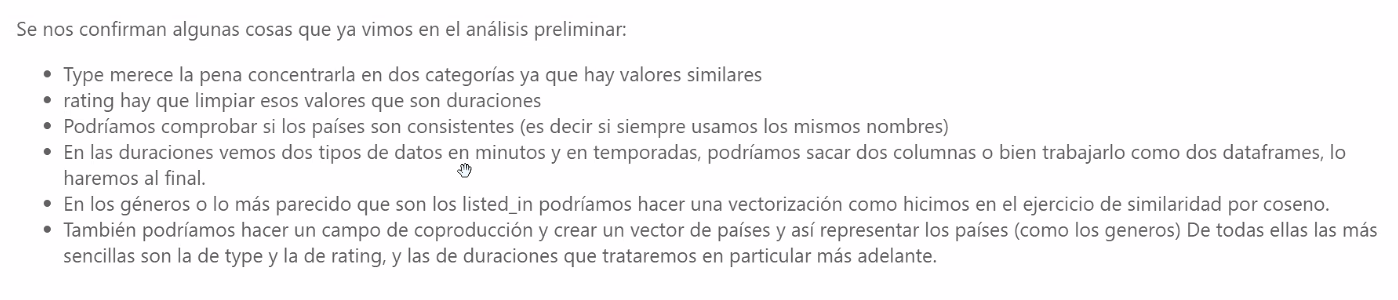

4. Limpia o simplifica/transforma dos de los campos detectados en 3, si hay al menos dos, si no, uno. Para ello puedes:  
4.1 Cualquier agrupa los valores de los campos tipo categoría con categorías similares que se llamen distinto.  
4.2 Quita valores extraños o que no correspondan. Conviertelos a "", y luego busca un valor para sustituirlos.

In [56]:
# Type

df.type.value_counts()

type
Movie        5597
TV Show      1231
Series TV    1004
Film          534
Show          441
Name: count, dtype: int64

In [58]:
def simplifica_type(tipo):
    if tipo in ["Movie", "Film"]:
        return "Movie"
    else: 
        return "Series TV"

df["type"] = df.type.apply(simplifica_type)
df.type.value_counts(dropna=False)

type
Movie        6131
Series TV    2676
Name: count, dtype: int64

In [60]:
# Rating

# condicion = df.rating.str.match("min") --> no funciona porque tiene nulos

def tiene_min (rate):
    if type(rate) == str:
        return "min" in rate
    else: 
        return False
    
condicion = df.rating.apply(tiene_min)
condicion

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: rating, Length: 8807, dtype: bool

In [61]:
df[condicion]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [62]:
df.loc[condicion, "duration"] = df.loc[condicion,"rating"]
df.loc[condicion,"rating"] = np.NaN

In [64]:
condicion = df.rating.apply(tiene_min)
df[condicion]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


*duration ahora no tiene ningún nulo*

5. Convierte o cambia el tipo de la columna con fechas en strings a un tipo datetime. La columna que son solo años es mejor dejarla como integer, porque se opera muy fácil así. Tendrás que analizar los argumentos de pd.datetime y jugar con ellos para poder conseguirlo.

In [66]:
df_back = df.copy()

In [67]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [68]:
df.date_added

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

## #3 Tratamiento de Missings/Nulos

Es hora de tratar los nulos. Así que habrá que identificarlos para empezar.

1. Haz una lista con las columnas que contienen valores nulos. Obtenla a "mano" mirando la salid del método info o bien haz un programa que las obtenga de forma automática.

In [70]:
col_con_nulos = df.columns[df.isnull().any()].tolist()
col_con_nulos

['director', 'cast', 'country', 'date_added', 'rating']

2. Obten el porcentaje de valores nulos para cada una de las columnas.

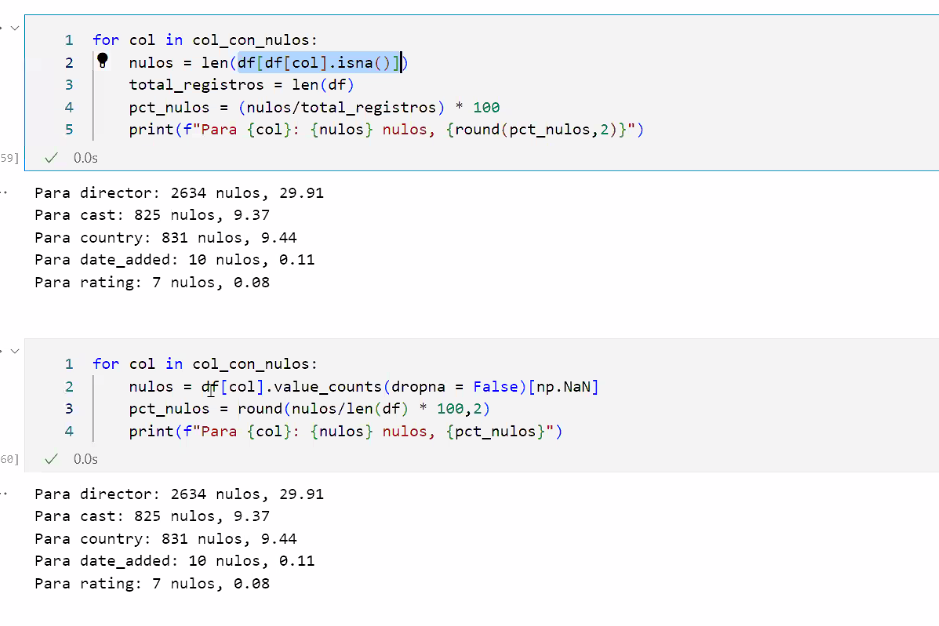

In [71]:
for col in col_con_nulos:
    nulos = len(df[df[col].isna()])
    total_registros = len(df)
    pct_nulos = (nulos/total_registros)*100
    print(f"Para {col}:{nulos}nulos, {round(pct_nulos,2)}")

Para director:2634nulos, 29.91
Para cast:825nulos, 9.37
Para country:831nulos, 9.44
Para date_added:10nulos, 0.11
Para rating:7nulos, 0.08


In [ ]:
for col in col_con_nulos:
    nulos =

3. Corrige de la mejor manera que se te ocurra las dos columnas con menor porcentajes de nulos.

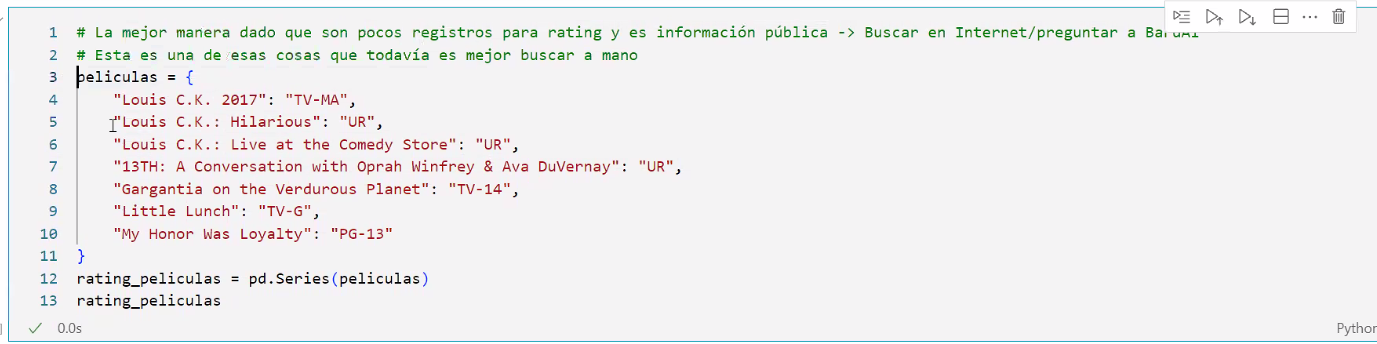

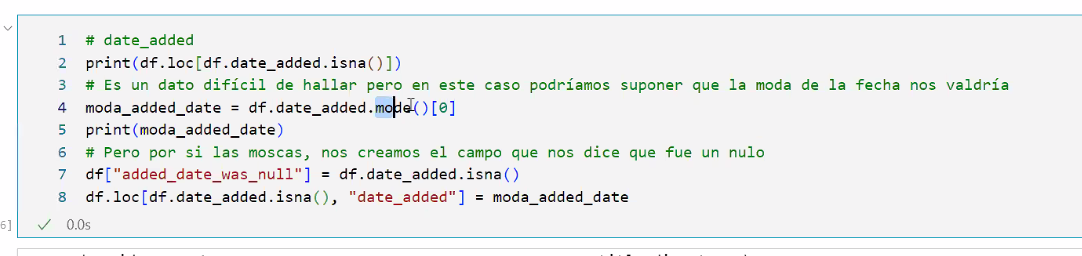

.mode() Siempre devuelve una serie, por lo tanto siempre hay que poner el [0] para que devuelva el valor concreto

4. En un caso como este, que no hay apenas valores numéricos y las columnas con nulos no son categóricas, es mejor o deshacerse de los nulos o bien simplemente marcarlos pero convertidos a un valor más manejable y del tipo del resto de valores de la columna en la que aparecen. Por eso cambia los nulos en las columnas que no hayas tratado en el apartado anterior por "UNK" o por "".

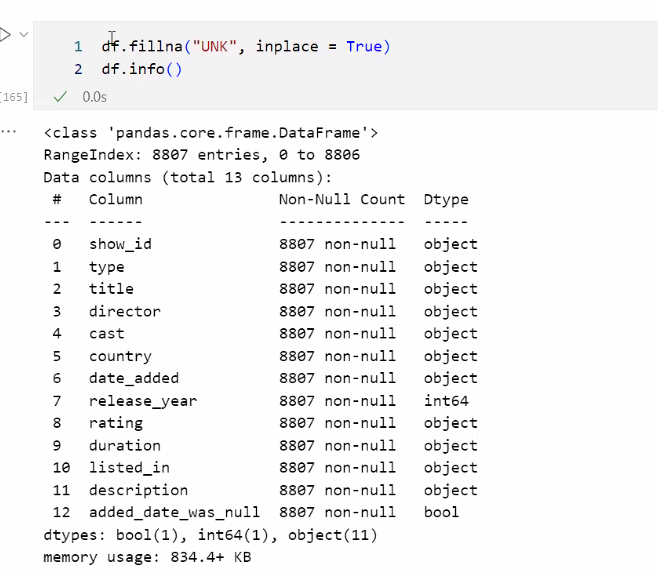

5. Comprueba ahora que no hemos generado duplicados, si existiesen borralos y quedate la primera ocurrencia.

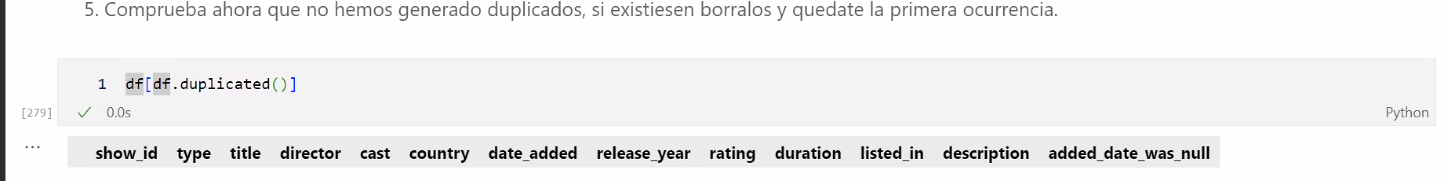

In [72]:
# La columna show_id nos está impidiendo ver si hay algún duplicado por el resto de columnas

df_2 = df.set_index("show_id")
len(df_2[df_2.duplicated(keep=False)])

2

In [73]:
df_2[df_2.duplicated(keep=False)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s3372,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...
s6530,Movie,Consequences,Ozan Açıktan,"Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...",Turkey,2019-10-25,2014,TV-MA,106 min,"Dramas, International Movies, Thrillers",Secrets bubble to the surface after a sensual ...


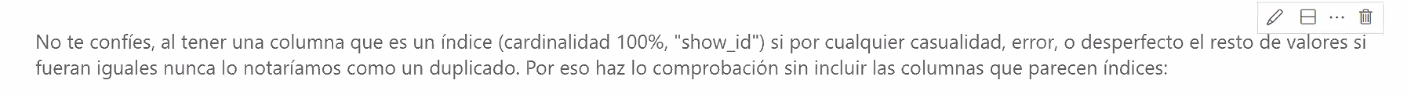

## #4 Generación de nuevos datos

Para terminar de hacer nuestro procesado, intentemos enriquecer el dataset y obtener alguna información adicional.

1. Separa el dataset en dos dataframes,uno de películas y otro de series. A veces aunque los datos parecen de la misma naturaleza, puede ser bueno separarlos para trabajar con ellos de forma independiente.

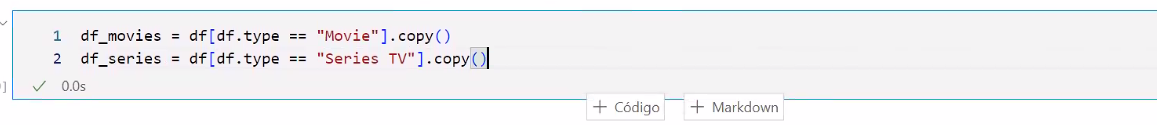

2. Ahora además podemos sacarle más provecho a algunos campos, por ejemplo duration. Muestra la distribución de valores para cada dataframe del campo "duration".

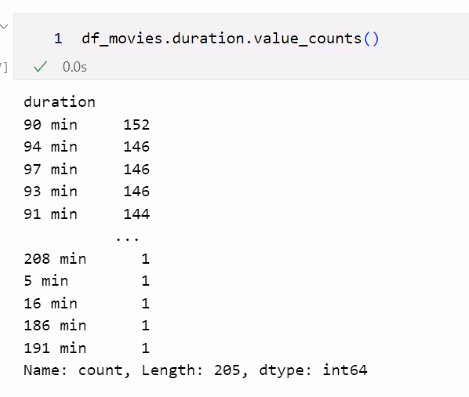

3. Convierte los valores de "duration" en cada dataframe a valores numéricos y cambia en el de las series el nombre por uno más representativo. Se valorará el emplear una expresión regular para obtener la información.

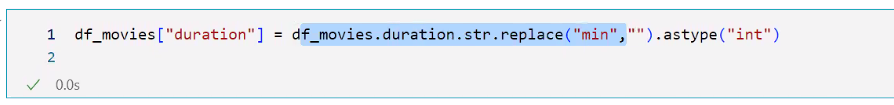

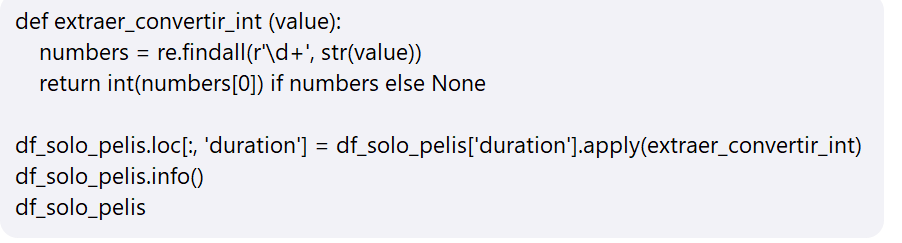

4. BONUS: Crea un campo "Posible_Secuela" en el dataset de películas con valor a False por defecto. Intenta (con expresiones regulares si es posible) hacer una función que aplicada (con apply) a un título determine si es una posible secuela o no. Emplea la función (con apply) para rellenar el campo "Posible_Secuela". Nota: No hace falta que sea infalible,ni que las cace todas sino que tenga una lógica defendible, piensa en la forma que normalmente tienen las secuelas, por ejemplo la de Terminator.m..

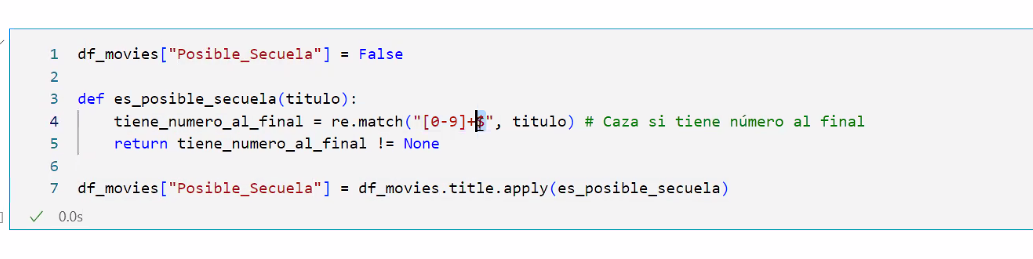

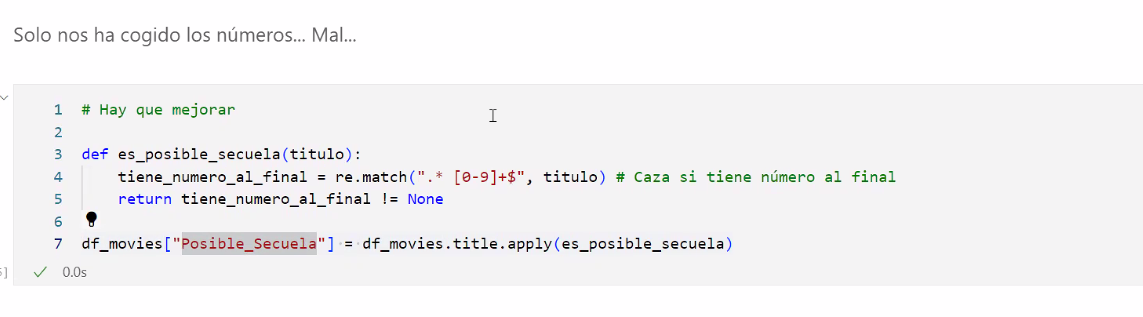

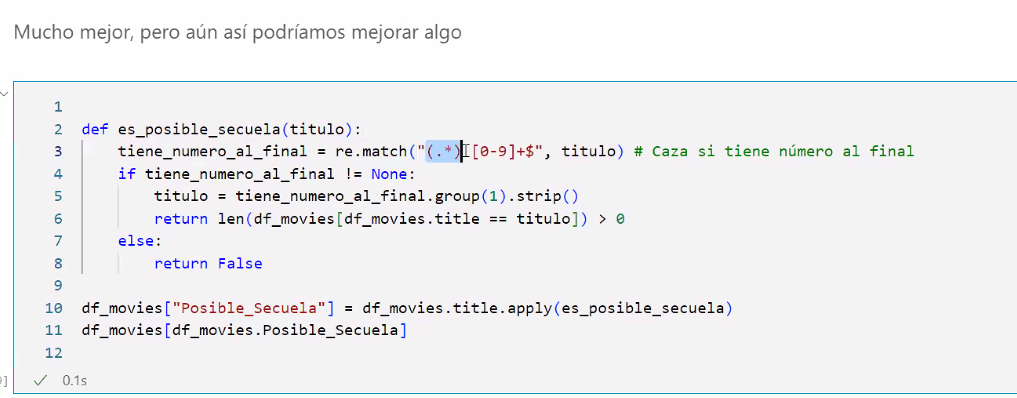